In [147]:
import netneurotools.datasets
import numpy as np
from msapy import msa, plottings as pl
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from copy import deepcopy

from numba import njit

from netneurotools.metrics import communicability_wei, communicability_bin

SEED = 2022
pl.set_style(font_size=8)
my_colors = ['#006685', '#3FA5C4', '#FFFFFF', '#E84653', '#BF003F']
colormap = sns.blend_palette(my_colors,as_cmap=True)
rng = np.random.default_rng(seed=SEED)

In [407]:
@njit
def simple_dynamical_system(adjacency_matrix,input_matrix):
    X = np.zeros((input_matrix.shape[0], input_matrix.shape[1]))

    for timepoint in range(input_matrix.shape[1] - 1):
        X[:, timepoint + 1] = np.tanh(adjacency_matrix @ X[:, timepoint] + input_matrix[:,timepoint])

    return X

def normer(x):
    return (x - x.min()) / (x.max() - x.min())

def lesion_simple_nodes(complements, network, index, input):
    if len(complements) == len(network) - 1:
       return 0.0

    lesioned_network = deepcopy(network)
    for target in complements:
      lesioned_network[:,target] = 0.0
    dynamics = simple_dynamical_system(lesioned_network,input)

    lesioned_signal = dynamics[index,10:]
    return float(lesioned_signal.var())
    #return float(lesioned_signal[-1])

In [408]:
chain = nx.to_numpy_array(nx.generators.path_graph(6,nx.DiGraph())).T
closedchain = chain.copy()
closedchain[0,5]=1
symmetricchain = nx.to_numpy_array(nx.generators.path_graph(6))
timesteps = 100
example_input = np.zeros((6,timesteps))

example_input[0,20:30] += 1


In [409]:
simple_chain_dynamics = simple_dynamical_system(chain,example_input)
closed_chain_dynamics = simple_dynamical_system(closedchain,example_input)
symmetric_chain_dynamics = simple_dynamical_system(symmetricchain,example_input)

/tmp/ipykernel_31163/1945076372.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  X[:, timepoint + 1] = np.tanh(adjacency_matrix @ X[:, timepoint] + input_matrix[:,timepoint])
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_31163/1945076372.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  X[:, timepoint + 1] = np.tanh(adjacency_matrix @ X[:, timepoint] + input_matrix[:,timepoint])
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warn

In [410]:
cchain= communicability_bin(chain)
cchain[np.diag_indices_from(cchain)] = 0

ccchain= communicability_bin(closedchain)
ccchain[np.diag_indices_from(cchain)] = 0

csychain= communicability_bin(symmetricchain)
csychain[np.diag_indices_from(cchain)] = 0


In [411]:
lesion_params = {'network': chain, 'input': example_input}
ci_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)

lesion_params['network'] = closedchain
ci_closed_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)

lesion_params['network'] = symmetricchain
ci_symmetric_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)

working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 15250.28it/s]


working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14893.22it/s]


working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 15547.06it/s]


working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 15361.99it/s]


working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 15232.97it/s]


working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 10099.91it/s]


working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16961.67it/s]


working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16804.52it/s]


working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 17143.66it/s]


working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14768.68it/s]


working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14824.14it/s]


working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16545.58it/s]


working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16118.38it/s]


working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14773.55it/s]


working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16241.25it/s]


working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 15445.08it/s]


working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14196.92it/s]


working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14893.22it/s]


In [412]:
chain_mask = np.where(cchain!=0,1,0)
closedchain_mask = np.where(ccchain!=0,1,0)
symmetricchain_mask = np.where(csychain!=0,1,0)

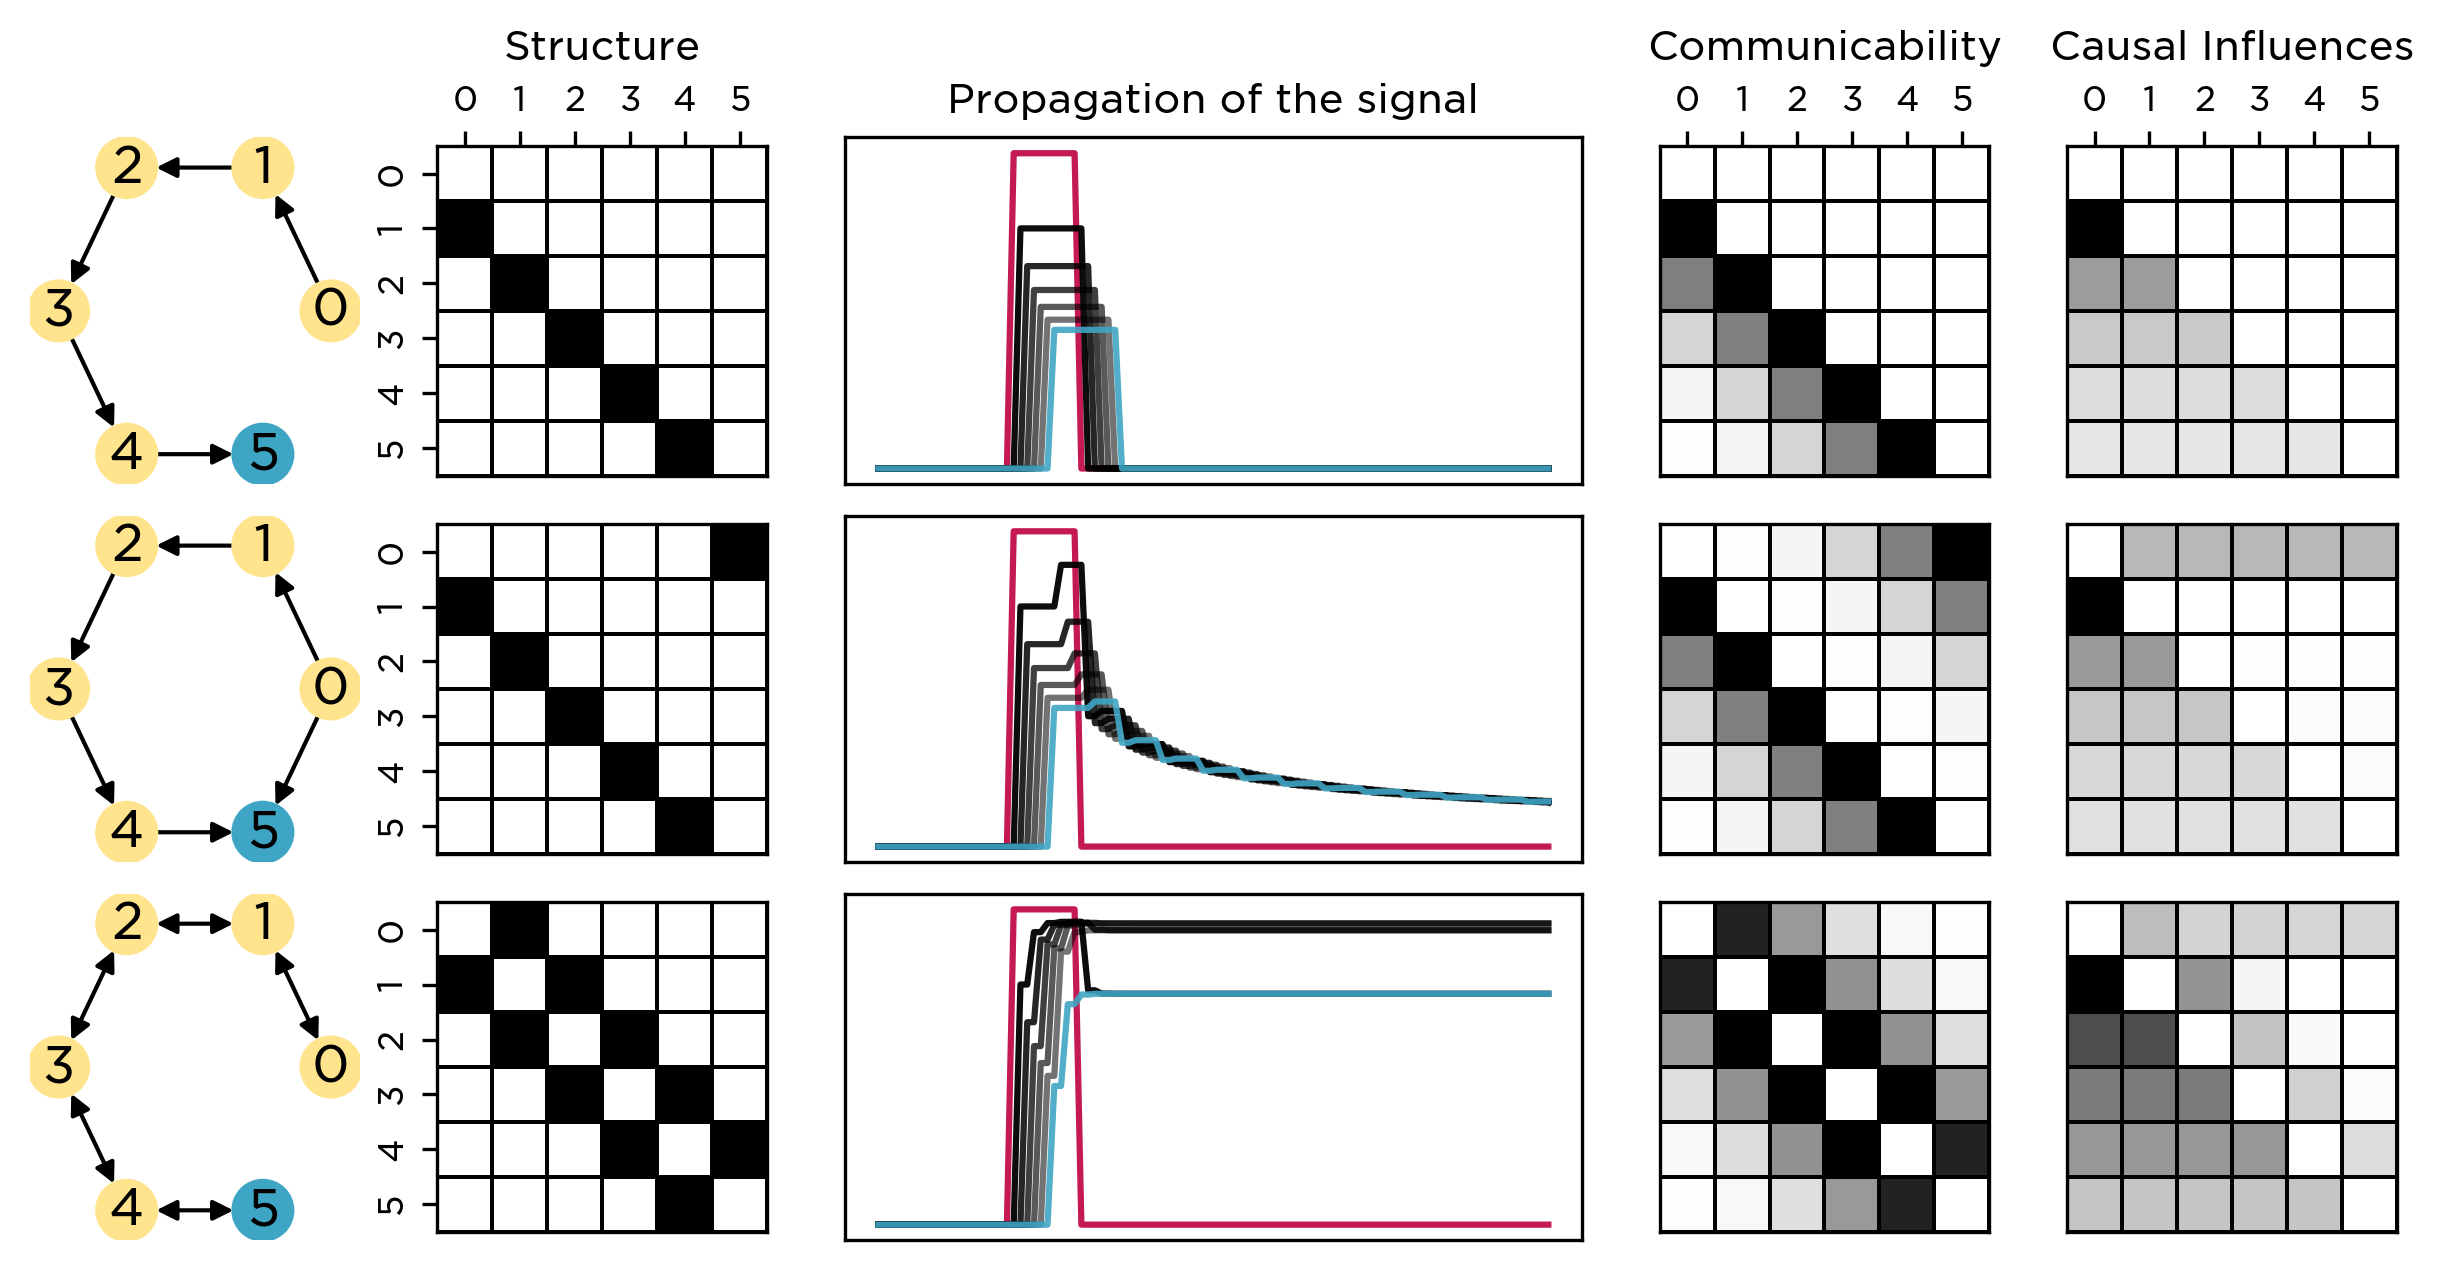

In [488]:
# fig,axes = plt.subplot_mosaic([['X','CX','CIX','B', 'B','A'],
#                                ['Y','CY','CIY','D', 'D','C'],
#                                ['Z','CZ','CIZ','F', 'F','E']],figsize=(8,4.2),dpi=300)

fig,axes = plt.subplot_mosaic([['A','X','B', 'B','CX','CIX'],
                               ['C','Y','D', 'D','CY','CIY'],
                               ['E','Z','F', 'F','CZ','CIZ']],figsize=(8,4.2),dpi=300)

#===================================== STRUCTURE
sns.heatmap(chain,
            square=True,
            cmap='binary',cbar=False,ax=axes['X'],linewidths=0.5, linecolor='k')

sns.heatmap(closedchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['Y'],linewidths=0.5, linecolor='k')

sns.heatmap(symmetricchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['Z'],linewidths=0.5, linecolor='k')
#===================================== COMMUNICABILITY
sns.heatmap(cchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CX'],linewidths=0.5, linecolor='k')

sns.heatmap(ccchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CY'],linewidths=0.5, linecolor='k')

sns.heatmap(csychain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CZ'],linewidths=0.5, linecolor='k')
#===================================== CAUSAL INFLUENCE - COMMUNICABILITY
sns.heatmap(ci_chain*chain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIX'],linewidths=0.5, linecolor='k')

sns.heatmap(ci_closed_chain*closedchain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIY'],linewidths=0.5, linecolor='k')

sns.heatmap(ci_symmetric_chain*symmetricchain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIZ'],linewidths=0.5, linecolor='k')


node_colors=['#FFE48D','#FFE48D','#FFE48D','#FFE48D','#FFE48D','#3FA5C4']
nx.draw_circular(nx.from_numpy_array(chain),ax=axes['A'],
                 arrows=True,node_size=200,node_color=node_colors,with_labels=True)
nx.draw_circular(nx.from_numpy_array(closedchain),ax=axes['C'],
                 arrows=True,node_size=200,node_color=node_colors,with_labels=True)
nx.draw_circular(nx.from_numpy_array(symmetricchain),ax=axes['E'],
                 arrows=True,node_size=200,node_color=node_colors,arrowstyle='<|-|>',with_labels=True)
for ax in ['B','D','F']:
    axes[ax].plot(example_input[0],c=my_colors[-1],alpha=0.9)

    axes[ax].yaxis.set_visible(False)

for ax in ['B','C','D','Y','Z']:
    axes[ax].xaxis.set_visible(False)
for i in range(len(chain)):
    if i < len(chain)-1:
        axes['B'].plot(simple_chain_dynamics.T[:,i],c='k',alpha=1-((i/10)+0.05))
    else:
        axes['B'].plot(simple_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

for i in range(len(chain)):
    if i < len(chain)-1:
        axes['D'].plot(closed_chain_dynamics.T[:,i],c='k',alpha=1-((i/10)+0.05))
    else:
        axes['D'].plot(closed_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

for i in range(len(chain)):
        if i < len(chain)-1:
            axes['F'].plot(symmetric_chain_dynamics.T[:,i],c='k',alpha=1-((i/10)+0.05))
        else:
            axes['F'].plot(symmetric_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

axes['B'].title.set_text('Propagation of the signal')
axes['X'].title.set_text('Structure')
axes['CX'].title.set_text('Communicability')
axes['CIX'].title.set_text('Causal Influences')

axes['B'].yaxis.tick_right()

for ax in ['X','CX','CIX']:
    axes[ax].xaxis.tick_top()
for ax in ['CY','CZ','CIY','CIZ','F']:
    axes[ax].xaxis.set_visible(False)

for ax in ['CX','CY','CZ','CIX','CIY','CIZ']:
    axes[ax].yaxis.set_visible(False)

for ax in axes:
    axes[ax].spines['right'].set_visible(True)
    axes[ax].spines['top'].set_visible(True)
    axes[ax].spines['bottom'].set_visible(True)
    axes[ax].spines['left'].set_visible(True)
fig.tight_layout(pad=0.5)

plt.savefig(f"chain_propagation.pdf",dpi=600,bbox_inches='tight')

In [101]:
human = netneurotools.datasets.fetch_connectome('human_struct_scale033')

In [164]:
connectivity = normer(human['conn'])
n_neurons = len(connectivity)
communication_mask = np.where(communicability_wei(connectivity)!=0,1,0)
chuman = normer(communicability_wei(connectivity))


In [162]:
timesteps = 100

# careers = [np.sin(np.linspace(1,i,timesteps)).squeeze() for i in range(n_neurons)]
# input = np.array(careers) *0.1


input = np.zeros((n_neurons,timesteps))
input[0,20:25] += 1
simple_human_dynamics = simple_dynamical_system(connectivity,input)

In [ ]:
lesion_params = {'network': connectivity, 'input': input}
ci_mat = msa.estimate_causal_influences(elements=list(range(n_neurons)),
                                        objective_function=lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=-1)

In [310]:
normalized_ci = normer(ci_mat*communication_mask)
diff = normalized_ci - chuman
diff = diff.fillna(0)
lower = np.percentile(diff, 5)
upper = np.percentile(diff, 95)
diff[(diff < upper) & (diff > lower)] = 0.0

/tmp/ipykernel_31163/2163759134.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1)


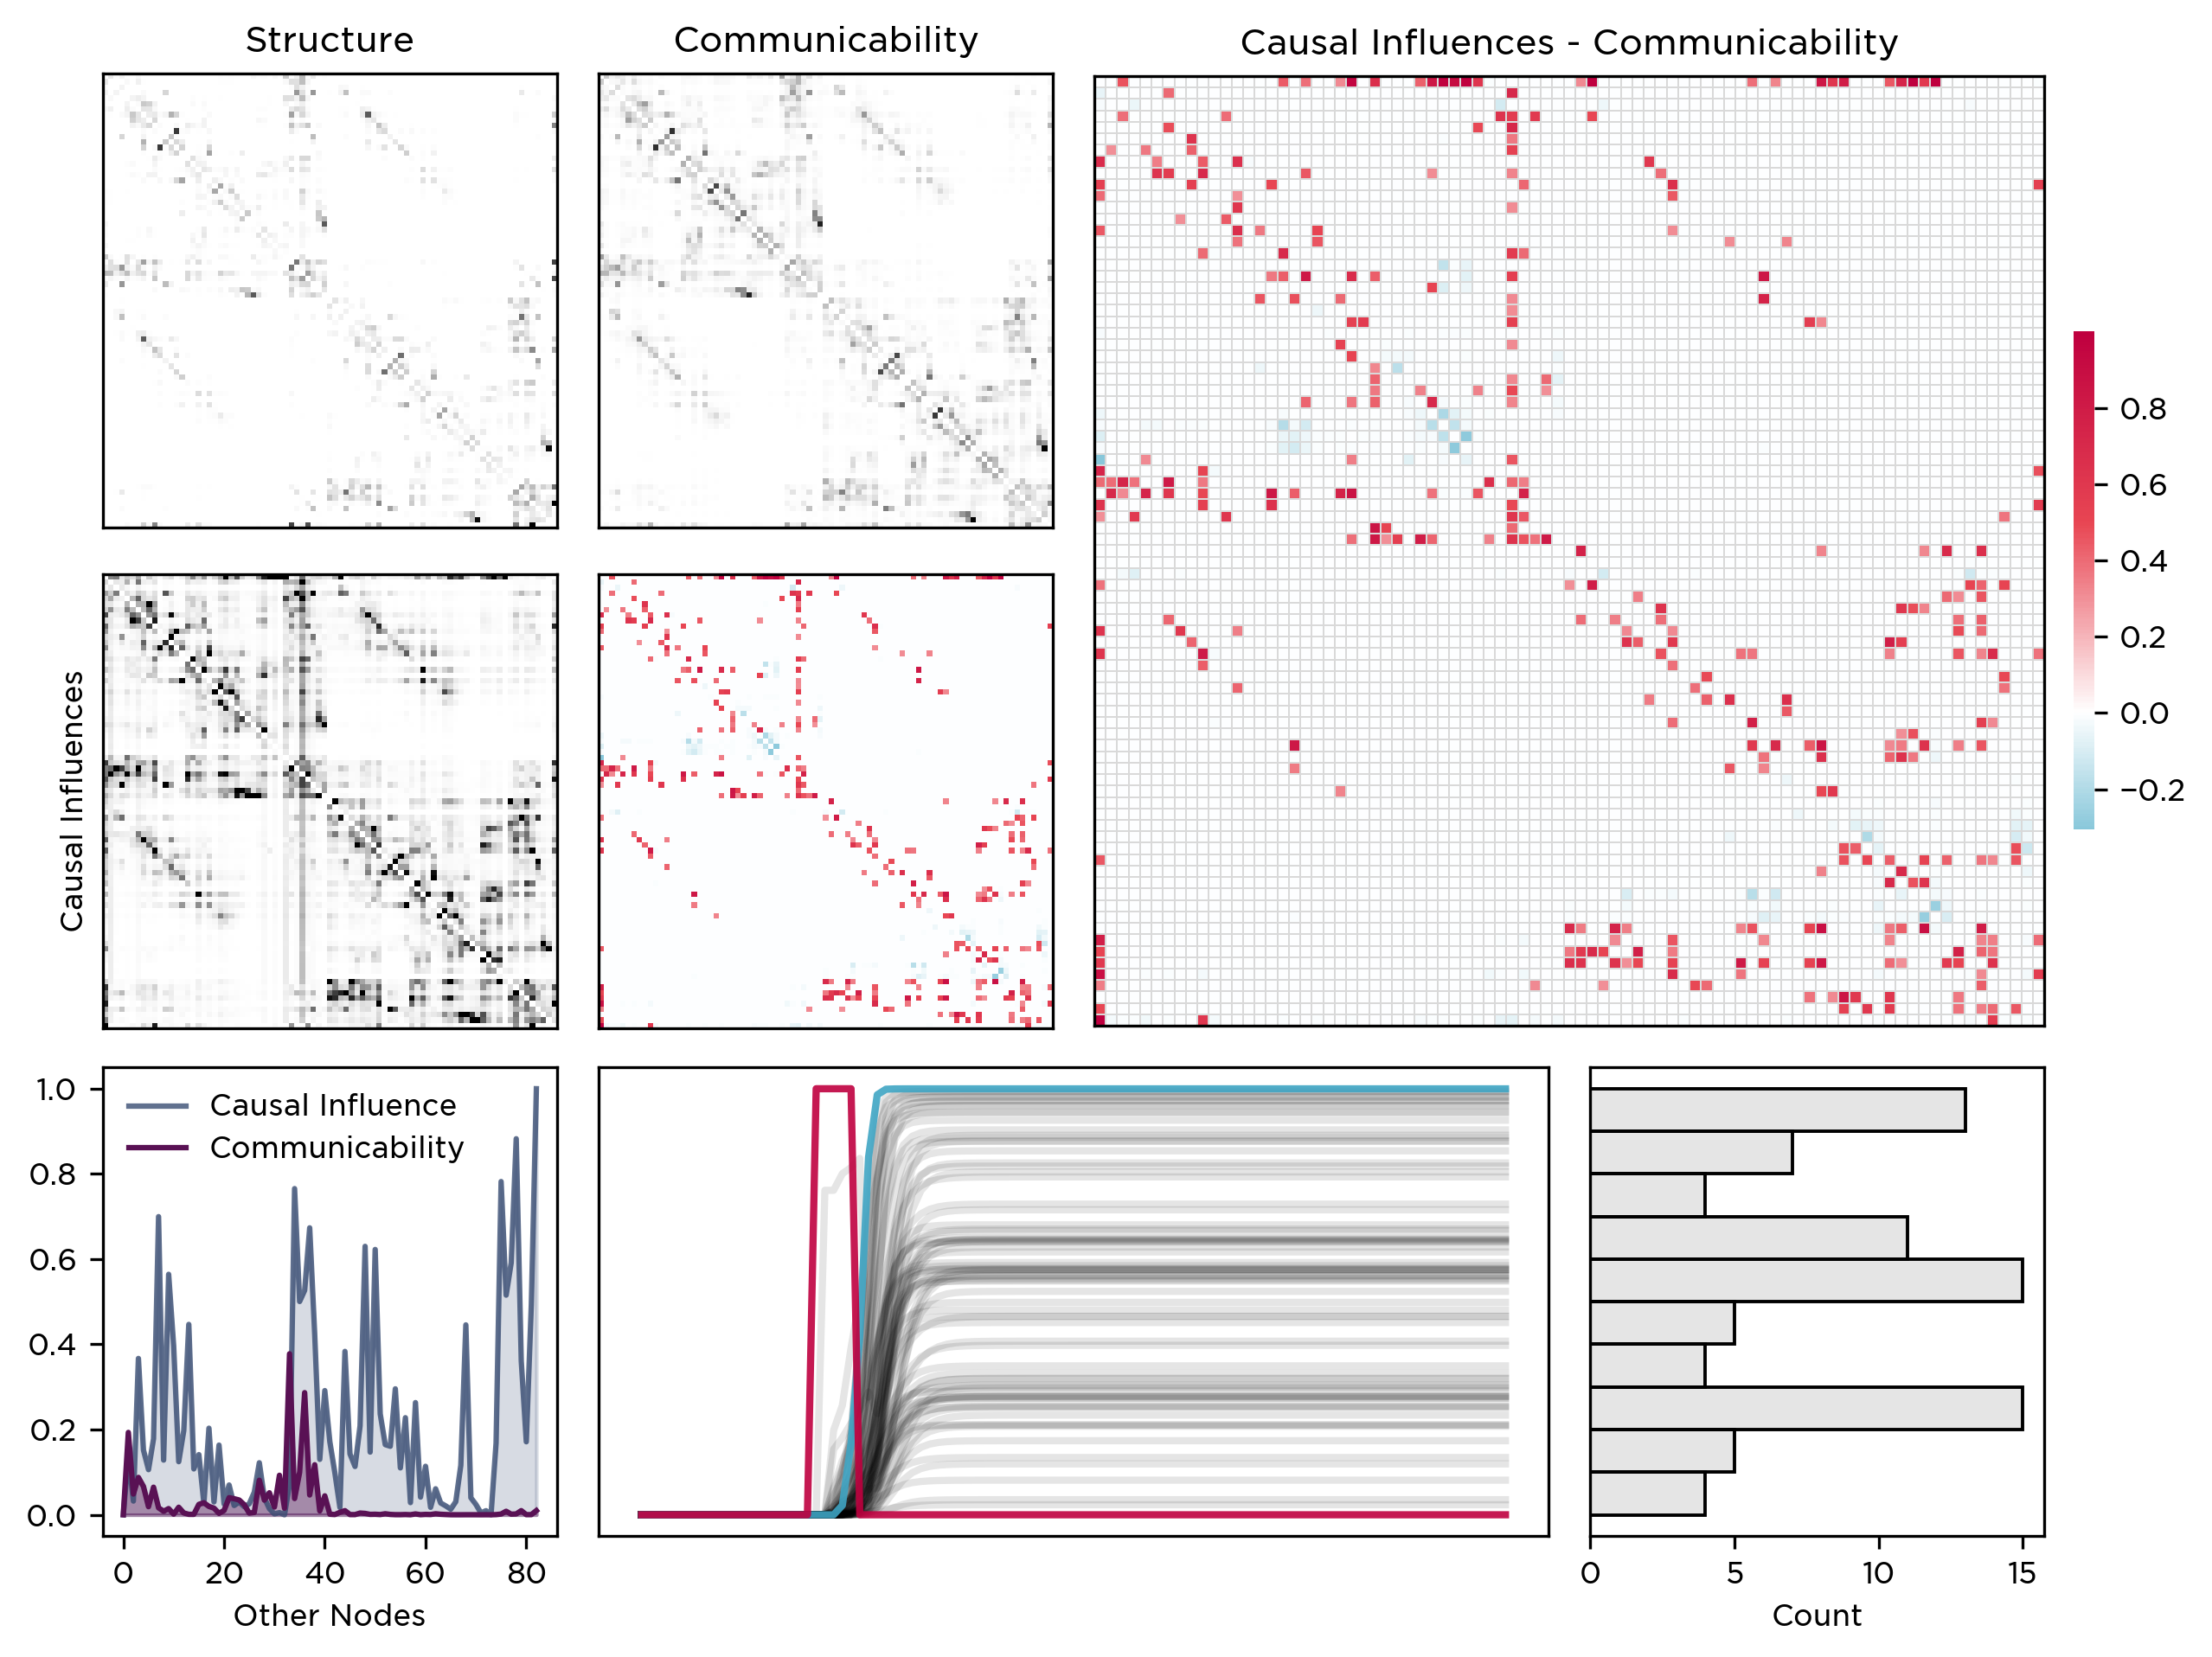

In [486]:
fig,axes = plt.subplot_mosaic([['A','CA','Z','Z'],
                               ['CI','DI','Z','Z'],
                                ['C','B','B','H']],figsize=(8,6.4),dpi=300)
cbar_ax = fig.add_axes([1, .5, .01, .3])

sns.heatmap(connectivity,square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['A'],linewidths=0, linecolor='k')
sns.heatmap(chuman,square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['CA'],linewidths=0, linecolor='k')

sns.heatmap(normalized_ci*communication_mask,square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['CI'],linewidths=0, linecolor='k')
sns.heatmap(diff,square=True,xticklabels=False,yticklabels=False,center=0,
            cmap=colormap,cbar=False,ax=axes['DI'],linewidths=0, linecolor='k')
sns.heatmap(diff,square=True,xticklabels=False,yticklabels=False,center=0,
            cmap=colormap,cbar_ax=cbar_ax,ax=axes['Z'],linewidths=0.01, linecolor='#D9D9D9')
for ax in axes:
    axes[ax].spines['right'].set_visible(True)
    axes[ax].spines['top'].set_visible(True)
    axes[ax].spines['bottom'].set_visible(True)
    axes[ax].spines['left'].set_visible(True)

axes['B'].xaxis.set_visible(False)
for i in range(len(connectivity)):
    if i < len(connectivity)-1:
        axes['B'].plot(simple_human_dynamics.T[:,i],c='k',alpha=0.1,linewidth=2)
    else:
        axes['B'].plot(simple_human_dynamics.T[:,i],c=my_colors[1],alpha=(0.9),linewidth=2)
axes['B'].plot(input[0],c=my_colors[-1],alpha=0.9,linewidth=2)

sns.histplot(y=simple_human_dynamics.T[-1,:],ax=axes['H'],binwidth=0.1,fill=True,color='k',element="bars",alpha=0.1)
#sns.histplot(y=simple_human_dynamics.T[-1,:],ax=axes['H'],binwidth=0.1,fill=False,color='k',element="step")

axes['H'].yaxis.set_visible(False)
#axes['B'].title.set_text('Propagation of the signal through the human connectome')
axes['A'].title.set_text('Structure')
axes['CA'].title.set_text('Communicability')
axes['Z'].title.set_text('Causal Influences - Communicability')
axes['CI'].set_ylabel("Causal Influences")
axes['B'].yaxis.set_visible(False)


x = np.linspace(0, len(connectivity)-1, len(connectivity))

axes['C'].fill_between(x,normalized_ci[0].fillna(0),color='#394D73',alpha=0.2)
axes['C'].fill_between(x,chuman[:,0],color='#591154',alpha=0.4)
axes['C'].plot(normalized_ci[0].fillna(0),color='#394D73',label='Causal Influence',alpha=0.8)
axes['C'].plot(chuman[:,0],color='#591154',label='Communicability')

axes['C'].legend(frameon=False,markerscale=0.1)
#axes['C'].set_ylabel("Node 0")
axes['C'].set_xlabel("Other Nodes")
fig.tight_layout(pad=1)
plt.savefig(f"human_propagation.pdf",dpi=600,bbox_inches='tight')

/tmp/ipykernel_31163/800569542.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


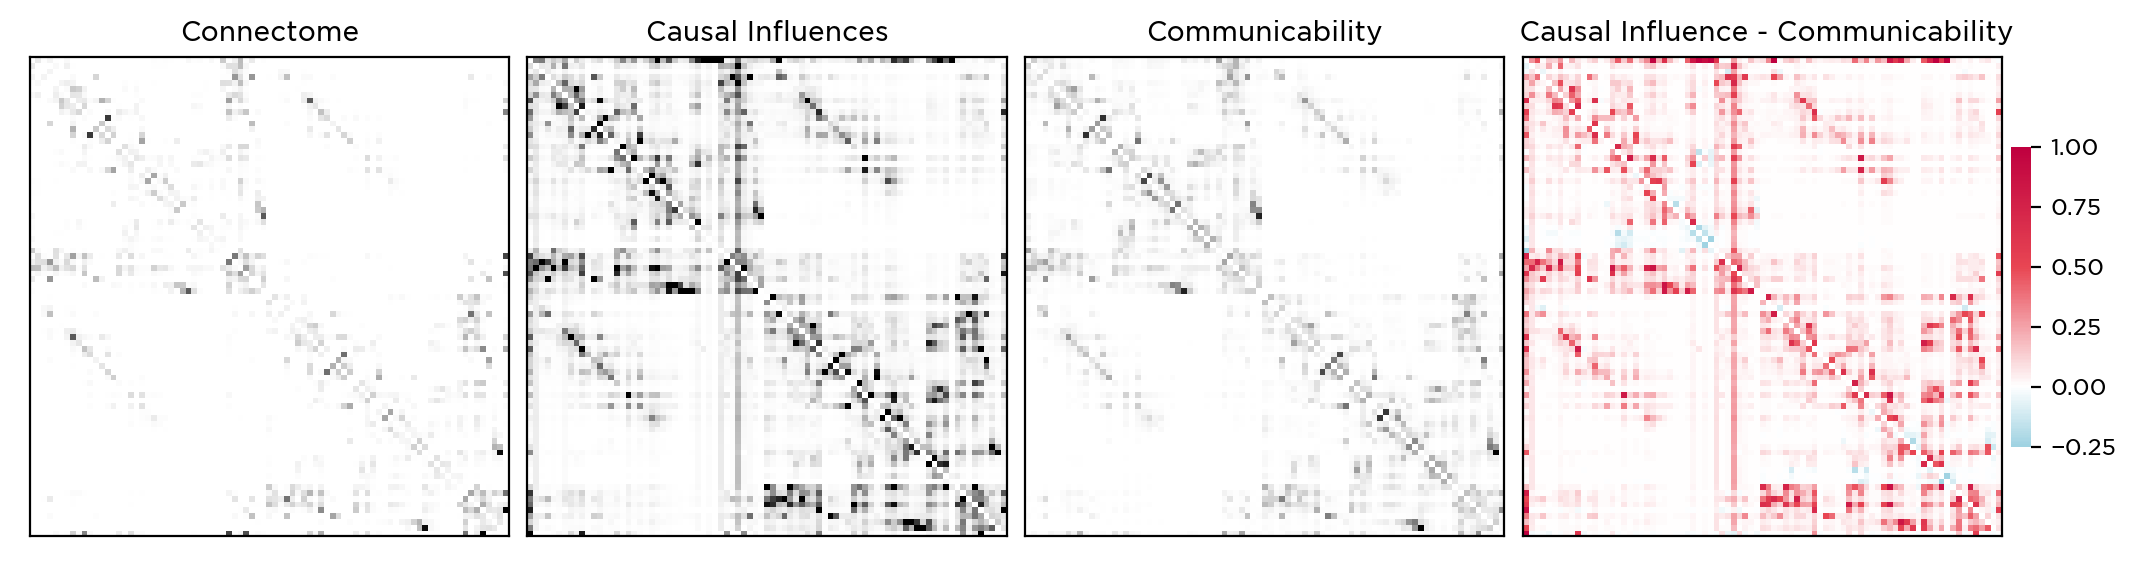

In [298]:
# fig, axes = plt.subplot_mosaic(
#     [['X', 'A', 'B', 'C']], figsize=(10, 5), dpi=200)
#
# cbar_ax = fig.add_axes([1, .35, .01, .3])
#
# sns.heatmap(connectivity, square=True,
#             cmap='binary', cbar_kws={"shrink": .5},
#             ax=axes['X'], linewidths=0., linecolor='k',
#             xticklabels=False,yticklabels=False, cbar = False)
# sns.heatmap(diff, square=True,
#             cmap=colormap, center=0, cbar_kws={"shrink": .5}, ax=axes['C'], linewidths=0.,vmax=1,vmin=-0.25, linecolor='k',xticklabels=False,yticklabels=False, cbar_ax = cbar_ax)
# sns.heatmap(chuman, square=True,
#             cmap='binary', cbar_kws={"shrink": .5}, ax=axes['B'], linewidths=0., linecolor='k',xticklabels=False,yticklabels=False,cbar=False)
# sns.heatmap(normalized_ci, square=True,
#             cmap='binary', cbar_kws={"shrink": .5}, ax=axes['A'], linewidths=0., linecolor='k',xticklabels=False,yticklabels=False,cbar=False)
# axes['C'].title.set_text(' Causal Influence - Communicability')
# axes['B'].title.set_text('Communicability')
# axes['A'].title.set_text('Causal Influences')
# axes['X'].title.set_text('Connectome')
#
# for ax in axes:
#     axes[ax].spines['right'].set_visible(True)
#     axes[ax].spines['top'].set_visible(True)
#     axes[ax].spines['bottom'].set_visible(True)
#     axes[ax].spines['left'].set_visible(True)
#
# fig.tight_layout(pad=0.4)
#
# plt.savefig(f"CO vs CI.pdf",dpi=600,bbox_inches='tight')